In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from scipy import stats
from sklearn.decomposition import PCA

from scripts.parkinson_processing_lib import d_norm
from scripts.parkinson_processing_lib import i_norm

# Загрузка и предобработка данных

In [18]:
data = pd.read_excel("C:\\Users\\nikba\\.vscode\\Projects\\Scientific_work\\data\\data_merged_3.xlsx", index_col=0)
data.sample(100)

,IDcard,AGE,SEX,GROUP,PARKINSON,STAGE,PD_duration (years),курение,АГ,СД,...,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991
182,C161823,50.0,female,Parkinson,YES,3-stage,20.0,нет,нет,нет,...,34,34,34,35,38,34,30,27,28,37
353,C486523,81.0,female,Comparison,NO,Comparison,NaN,нет,да,да,...,32,46,33,26,38,28,-10,32,35,33
146,CG19,60.0,female,Control,NO,Control,NaN,NaN,NaN,NaN,...,43,41,44,41,35,42,32,40,31,44
471,БП005(Л),68.0,female,Parkinson,YES,3-stage,NaN,нет,нет,нет,...,26,27,25,22,18,14,25,24,17,22
298,C374523,66.0,female,Comparison,NO,Comparison,NaN,нет,да,нет,...,32,33,29,36,30,24,31,32,28,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,CG1,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,...,26,26,28,22,22,13,45,15,28,19
67,CG9,71.0,male,Control,NO,Control,NaN,NaN,NaN,NaN,...,39,32,41,33,31,30,104,28,28,26
448,БП004(Л),64.0,male,Parkinson,YES,1-stage,NaN,нет,да,нет,...,57,48,48,44,47,48,50,33,39,41
498,БП007(Л),75.0,female,Parkinson,YES,3-stage,NaN,нет,да,нет,...,43,31,28,35,23,29,71,25,15,32


In [7]:
data["STAGE"].value_counts() // 8

STAGE
Control       20
3-stage       18
Comparison    15
1-stage        7
2-stage        3
Name: count, dtype: int64

In [2]:
data_new = pd.read_excel(".\data\клинические1 дополненная обр.xlsx", index_col=0)

In [53]:
data_new.columns

Index(['N', 'Name', 'IDcard', 'Sex', 'Age', 'Group', 'STAGE',
       'PD_duration (years)', 'курение', 'АГ', 'СД', 'ХПН', 'Подагра',
       'другое', '(ДАТА)', 'RBC—число эритроцитов в литре крови10^12',
       'Гематокрит(%)', 'Нейтрофилы(%)', 'Цветовой показатель', 'Тромбоциты ',
       'Лейкоциты', 'Эозинофилы%', 'Базофилы%', 'Лимфоциты%', 'Моноциты%',
       'Палочкоядерные%', 'Сегментоядерные%', 'Лимфоциты', 'Моноциты',
       'Эозинофилы', 'Базофилы*10(9)/л', 'Нейтрофилы*10(9)/л',
       'Полихроматофилия-анизохромия', 'СОЭ-мм/час',
       'HGB—общее содержание гемоглобина(г/л)', 'GLU-ммоль/л',
       'TCHO-общий холестерин ммол/Л', ' HbA1C%', 'MCV фл', 'MCH пг',
       'MCHС г/л', 'Удельныйвес-г/л', 'Сахар', 'Кетоновые тела', 'Белок-г/л',
       'Реакция', 'Лейкоциты-вп/зр*2', 'Нитриты'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
data_new.head(5)

,Name,IDcard,Sex,Age,Group,STAGE,PD_duration (years),курение,АГ,СД,ХПН,Подагра,другое,(ДАТА),RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Нейтрофилы(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,Палочкоядерные%,Сегментоядерные%,Лимфоциты,Моноциты,Эозинофилы,Базофилы*10(9)/л,Нейтрофилы*10(9)/л,Полихроматофилия-анизохромия,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,HbA1C%,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,ЕрохинаАВ,AK-12117-23,female,63,БП,1-stage,1.0,NaN,нет,нет,нет,нет,NaN,NaT,4.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,5.6,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,СоколовАВ,AK-17151-23,male,66,БП,1-stage,2.0,NaN,нет,нет,нет,нет,NaN,NaT,4.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,6.1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ЕфремоваГВ,C3457-23,female,79,СР,NaN,NaN,нет,да,нет,да,нет,NaN,2023-09-14,4.76,0.412,0.621,0.88,286.0,7.7,0.014,0.014,0.281,0.070,NaN,NaN,2.2,0.5,0.1,0.1,4.8,NaN,2.0,141,5.4,8.6,NaN,86.6,29.6,342.0,NaN,отрицательно,отрицательно,0.034,Кислая,NaN,отрицательно
4,СтепановаОН,C3507-23,female,71,СР,NaN,NaN,нет,да,нет,нет,нет,NaN,2023-09-19,4.13,0.362,0.559,0.90,312.0,9.3,0.048,0.014,0.304,0.075,NaN,NaN,2.8,0.7,0.4,0.1,5.3,NaN,6.0,156,5.8,5.7,NaN,87.7,29.8,340.0,NaN,отрицательно,отрицательно,0.023,Кислая,NaN,отрицательно
5,Ярова,C3675-23,female,61,СР,NaN,NaN,нет,да,да,нет,нет,Дислипиемия,2023-09-27,4.59,0.409,0.643,0.90,329.0,6.7,0.025,0.007,0.258,0.067,0.02,0.623,1.7,0.4,0.2,0,4.4,NaN,20.0,138,5.5,7.3,0.081,89.1,30.1,337.0,1015.0,отрицательно,отрицательно,0.048,Слабокислая,8.0,отрицательно


In [316]:
pd.set_option('display.max_columns', None)
features = ['IDcard', 'Sex', 'Age', 'STAGE', 'PD_duration (years)', 'курение', 'АГ', 'СД', 'ХПН', 'Подагра', 
            'RBC—число эритроцитов в литре крови10^12', 'Гематокрит(%)', 'Цветовой показатель', 'Тромбоциты ', 
            'Лейкоциты', 'Эозинофилы%', 'Базофилы%', 'Лимфоциты%', 'Моноциты%', 'СОЭ-мм/час', 
            'HGB—общее содержание гемоглобина(г/л)', 'GLU-ммоль/л', 'TCHO-общий холестерин ммол/Л', 'MCV фл', 'MCH пг', 
            'MCHС г/л', 'Удельныйвес-г/л', 'Сахар', 'Кетоновые тела', 'Белок-г/л', 
            'Реакция', 'Лейкоциты-вп/зр*2', 'Нитриты']
data_new = data_new[features]
data_new.sample(10)

,IDcard,Sex,Age,STAGE,PD_duration (years),курение,АГ,СД,ХПН,Подагра,RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23,C3889-23,male,65,NaN,NaN,нет,да,нет,нет,нет,4.56,0.403,0.89,197.0,4.8,0.014,0.008,0.241,0.071,5.0,137,4.2,5.7,88.4,30.0,340.0,1005.0,отрицательно,отрицательно,0.026,Нейтральная,1.0,отрицательно
20,AK-30970-23,male,64,1-stage,4.0,нет,да,нет,да,нет,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,5.4,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,C3910-23,female,79,NaN,NaN,нет,да,нет,нет,нет,4.54,0.389,0.87,213.0,6.1,0.031,0.008,0.193,0.076,18.0,131,3.9,5.7,85.7,28.9,337.0,1004.0,отрицательно,отрицательно,0.019,Кислая,3.0,отрицательно
19,AK-30867-23,female,67,3-stage,8.0,нет,да,нет,нет,нет,4.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,6.1,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,C-5950-23,female,63,2-stage,6.0,нет,да,нет,нет,нет,4.81,0.382,0.81,285.0,6.6,0.009,0.016,0.320,0.053,37.0,130,5.8,6.9,79.4,27.0,340.0,1024.0,отрицательно,отрицательно,0.067,Кислая,4.0,отрицательно
29,C1752-23,male,70,3-stage,20.0,нет,да,нет,да,нет,4.06,0.377,0.96,149.0,6.8,0.030,0.010,0.190,0.064,3.0,131,4.1,3.1,92.9,32.3,347.0,1009.0,отрицательно,отрицательно,0.037,Кислая,3.0,отрицательно
13,C4912-23,female,84,NaN,NaN,нет,да,нет,да,нет,4.25,0.385,0.93,223.0,4.1,0.000,0.000,0.500,0.110,15.0,134,4.7,4.9,90.6,31.5,348.0,1010.0,отрицательно,отрицательно,0.046,Кислая,NaN,положительно
4,C3507-23,female,71,NaN,NaN,нет,да,нет,нет,нет,4.13,0.362,0.90,312.0,9.3,0.048,0.014,0.304,0.075,6.0,156,5.8,5.7,87.7,29.8,340.0,NaN,отрицательно,отрицательно,0.023,Кислая,NaN,отрицательно
30,C1776-23,female,63,3-stage,10.0,нет,да,нет,нет,нет,4.39,0.407,0.95,172.0,4.9,0.060,0.010,0.390,0.100,8.0,139,4.6,7.2,92.7,31.7,342.0,1009.0,отрицательно,отрицательно,0.025,Слабокислая,35.0,отрицательно


In [6]:
nans = data_new.isna().sum()
nans

Name                                         0
IDcard                                       0
Sex                                          0
Age                                          0
Group                                        0
STAGE                                       16
PD_duration (years)                         16
курение                                      3
АГ                                           2
СД                                           2
ХПН                                          1
Подагра                                      1
другое                                      20
(ДАТА)                                       7
RBC—число эритроцитов в литре крови10^12     0
Гематокрит(%)                                7
Нейтрофилы(%)                               17
Цветовой показатель                          8
Тромбоциты                                   7
Лейкоциты                                    7
Эозинофилы%                                  7
Базофилы%    

In [7]:
name_to_delete = "С5402-23"
data_new = data_new[data_new["IDcard"] != name_to_delete]
data_new["STAGE"] = data_new["STAGE"].fillna(value=0)
data_new["STAGE"] = data_new["STAGE"].apply(lambda x: x if x == 0 else int(x[0]))
data_new["PD_duration (years)"] = data_new["PD_duration (years)"].fillna(value=0)

In [318]:
cat_cols = list(data_new.dtypes[data_new.dtypes.values  == "object"].index) + ["STAGE"]
cat_cols.remove("IDcard")
num_cols = list(data_new.select_dtypes(exclude="object").columns)
num_cols.remove("STAGE")
for item in cat_cols:
    if data_new[item].isna().sum() != 0:
        data_new[item] = data_new[item].fillna(value=data_new[item].value_counts().idxmax())
for item in num_cols:
    if data_new[item].isna().sum() != 0:
        data_new[item] = data_new[item].fillna(value=data_new[item].mean())

In [48]:
data= pd.read_excel(".\data\БД.xlsx")
add_data = data.loc[424:, "курение":"Подагра"]
data = data.drop(columns=['PD_duration (years)', 'HGB — общее содержание гемоглобина (г/л)', 'RBC — число эритроцитов в литре крови 10^12', 'курение', 
                    'Гипертония', 'Сах диабет', 'ХПН', 'Подагра'])
data.rename(columns={"ID": "IDcard"}, inplace=True)

In [49]:
for col in add_data.columns:
    add_data[col] = add_data[col].apply(lambda x: "да" if x == "YES" else "нет")
add_data.rename(columns={"Гипертония": "АГ", "Сах диабет": "СД"}, inplace=True)

In [10]:
data_new.drop(columns=["Name", "Group"], inplace=True)
data_new.head()

,IDcard,Sex,Age,STAGE,PD_duration (years),курение,АГ,СД,ХПН,Подагра,...,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
N,,,,,,,,,,,,,,,,,,,,,
1,AK-12117-23,female,63,1-stage,1.0,NaN,нет,нет,нет,нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK-17151-23,male,66,1-stage,2.0,NaN,нет,нет,нет,нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C3457-23,female,79,NaN,NaN,нет,да,нет,да,нет,...,86.6,29.6,342.0,NaN,отрицательно,отрицательно,0.034,Кислая,NaN,отрицательно
4,C3507-23,female,71,NaN,NaN,нет,да,нет,нет,нет,...,87.7,29.8,340.0,NaN,отрицательно,отрицательно,0.023,Кислая,NaN,отрицательно
5,C3675-23,female,61,NaN,NaN,нет,да,да,нет,нет,...,89.1,30.1,337.0,1015.0,отрицательно,отрицательно,0.048,Слабокислая,8.0,отрицательно


In [11]:
data.head()

,IDcard,AGE,SEX,GROUP,PARKINSON,STAGE,401.733364,403.569237,405.405808,407.243077,...,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991
0,Аверкиев,NaN,male,Control,NO,Control,300,290,313,317,...,41,34,28,38,29,35,37,33,29,29
1,Аверкиев,NaN,male,Control,NO,Control,249,260,266,265,...,32,33,31,39,25,30,21,16,31,22
2,Аверкиев,NaN,male,Control,NO,Control,228,221,233,235,...,21,24,25,28,32,23,16,23,20,19
3,Аверкиев,NaN,male,Control,NO,Control,215,212,223,213,...,33,18,22,25,18,17,36,22,24,25
4,Аверкиев,NaN,male,Control,NO,Control,201,213,214,217,...,27,22,16,19,15,21,24,30,22,21


# Сшивка датасетов

In [12]:
def func(x):
    if x[:2] == "АК":
        return "AK" + x[2:]
    elif x[0] == "С":
        return "C" + x[1:]
    else:
        return x

In [25]:
data["IDcard"] = data["IDcard"].astype(str)
data_new["IDcard"] = data_new["IDcard"].astype(str)
data_new["IDcard"] = data_new["IDcard"].apply(lambda x: "".join(x.split(sep="-")))
data["IDcard"] = data["IDcard"].apply(lambda x: "".join(x.split(sep="-")))
data["IDcard"] = data["IDcard"].apply(func=func)
data_merged = data.merge(data_new.drop(columns=["Sex", "Age", "STAGE"]), on="IDcard", how="left")
#data_merged = data_merged.rename(columns=dict([(col, "D" + str(int(col[1:]) - 1)) for col in data_merged.loc[:, "D406":"D674"].columns]))

In [15]:
pd.set_option('display.max_columns', None)
data_merged.head()

,IDcard,AGE,SEX,GROUP,PARKINSON,STAGE,401.733364,403.569237,405.405808,407.243077,409.081044,410.919708,412.759068,414.599124,416.439876,418.281322,420.123463,421.966297,423.809824,425.654044,427.498956,429.344558,431.190852,433.037835,434.885509,436.733871,438.582921,440.43266,442.283085,444.134198,445.985996,447.83848,449.691649,451.545502,453.40004,455.25526,457.111163,458.967748,460.825014,462.682962,464.54159,466.400897,468.260884,470.121549,471.982892,473.844913,475.707611,477.570985,479.435035,481.29976,483.165159,485.031232,486.897979,488.765399,490.633491,492.502255,494.371689,496.241795,498.11257,499.984015,501.856128,503.72891,505.602359,507.476476,509.351259,511.226708,513.102822,514.979601,516.857044,518.735151,520.613921,522.493353,524.373447,526.254203,528.135619,530.017696,531.900432,533.783827,535.66788,537.552591,539.43796,541.323985,543.210667,545.098004,546.985996,548.874642,550.763942,552.653896,554.544502,556.43576,558.32767,560.220231,562.113442,564.007302,565.901812,567.796971,569.692778,571.589232,573.486333,575.384081,577.282474,579.181512,581.081195,582.981522,584.882493,586.784106,588.686362,590.589259,592.492797,594.396976,596.301795,598.207254,600.113351,602.020087,603.92746,605.83547,607.744117,609.6534,611.563318,613.473871,615.385058,617.296879,619.209333,621.122419,623.036138,624.950487,626.865468,628.781078,630.697319,632.614188,634.531686,636.449811,638.368564,640.287944,642.20795,644.128581,646.049838,647.971718,649.894223,651.817351,653.741102,655.665474,657.590469,659.516084,661.44232,663.369175,665.29665,667.224743,669.153455,671.082784,673.01273,674.943292,676.87447,678.806263,680.738671,682.671693,684.605328,686.539577,688.474437,690.40991,692.345993,694.282687,696.219991,698.157905,700.096427,702.035558,703.975297,705.915642,707.856594,709.798152,711.740316,713.683084,715.626457,717.570433,719.515012,721.460194,723.405978,725.352363,727.299349,729.246935,731.195121,733.143906,735.093289,737.043271,738.993849,740.945025,742.896796,744.849163,746.802126,748.755682,750.709833,752.664577,754.619913,756.575842,758.532362,760.489473,762.447175,764.405466,766.364347,768.323817,770.283874,772.244519,774.205751,776.16757,778.129974,780.092964,782.056538,784.020696,785.985438,787.950762,789.916669,791.883158,793.850228,795.817879,797.786109,799.754919,801.724308,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991,PD_duration (years),курение,АГ,СД,ХПН,Подагра,другое,(ДАТА),RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Нейтрофилы(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,Палочкоядерные%,Сегментоядерные%,Лимфоциты,Моноциты,Эозинофилы,Базофилы*10(9)/л,Нейтрофилы*10(9)/л,Полихроматофилия-анизохромия,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,HbA1C%,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
0,Аверкиев,NaN,male,Control,NO,Control,300,290,313,317,317,338,340,358,362,380,383,401,427,450,462,493,526,555,576,626,668,735,776,849,925,989,1074,1111,1141,1163.0,1171,1196,1222.0,1243,1262,1283,1261,1235,1220,1235,1257,1331,1388,1417,1442,1425,1416,1418,1429,1462,1494,1513,1521,1527,1486,1463,1403,1445,1448,1441,1426,1404,1368,1321,1248,1235,1213,1151,1114,1042,976,921,880,844,813,796,768,758,740,703,671,641,619,598.0,577,572,575,568,535,510,502,484,463,438,425,424,429,425,428,453,440,455,455,452,456,450,456,454,447,444,444,432,430,417,399,389,373,360,346,335,327,318,307,288,278,263,267.0,254,232,227,210,213,199,200,175,180,174,171,157,160,153,145,136,138,136,134,142,151,158,171,197,220,242,275,299,314,341,368,383,394,403,403,414,415,417,415,384,389,370,357,329,322,345,408,551,800,1139,1551,1950,2320,2650,2871,3031,3105,3081,3005,2827,2555,2228,1877,1556,1262,970,769,578,425,318,237,168,83,101,69,53,44,40,34,39,39,34,29,28,41,34,28,38,29,35,37,33,29,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,

In [26]:
buf = data_merged.loc[:, 401.733364293274:821.449909753926]
data_merged.drop(columns=buf.columns, inplace=True)
data_merged = data_merged.merge(buf, right_index=True, left_index=True)

In [27]:
data_merged.head()

,IDcard,AGE,SEX,GROUP,PARKINSON,STAGE,PD_duration (years),курение,АГ,СД,ХПН,Подагра,другое,(ДАТА),RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Нейтрофилы(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,Палочкоядерные%,Сегментоядерные%,Лимфоциты,Моноциты,Эозинофилы,Базофилы*10(9)/л,Нейтрофилы*10(9)/л,Полихроматофилия-анизохромия,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,HbA1C%,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты,401.733364,403.569237,405.405808,407.243077,409.081044,410.919708,412.759068,414.599124,416.439876,418.281322,420.123463,421.966297,423.809824,425.654044,427.498956,429.344558,431.190852,433.037835,434.885509,436.733871,438.582921,440.43266,442.283085,444.134198,445.985996,447.83848,449.691649,451.545502,453.40004,455.25526,457.111163,458.967748,460.825014,462.682962,464.54159,466.400897,468.260884,470.121549,471.982892,473.844913,475.707611,477.570985,479.435035,481.29976,483.165159,485.031232,486.897979,488.765399,490.633491,492.502255,494.371689,496.241795,498.11257,499.984015,501.856128,503.72891,505.602359,507.476476,509.351259,511.226708,513.102822,514.979601,516.857044,518.735151,520.613921,522.493353,524.373447,526.254203,528.135619,530.017696,531.900432,533.783827,535.66788,537.552591,539.43796,541.323985,543.210667,545.098004,546.985996,548.874642,550.763942,552.653896,554.544502,556.43576,558.32767,560.220231,562.113442,564.007302,565.901812,567.796971,569.692778,571.589232,573.486333,575.384081,577.282474,579.181512,581.081195,582.981522,584.882493,586.784106,588.686362,590.589259,592.492797,594.396976,596.301795,598.207254,600.113351,602.020087,603.92746,605.83547,607.744117,609.6534,611.563318,613.473871,615.385058,617.296879,619.209333,621.122419,623.036138,624.950487,626.865468,628.781078,630.697319,632.614188,634.531686,636.449811,638.368564,640.287944,642.20795,644.128581,646.049838,647.971718,649.894223,651.817351,653.741102,655.665474,657.590469,659.516084,661.44232,663.369175,665.29665,667.224743,669.153455,671.082784,673.01273,674.943292,676.87447,678.806263,680.738671,682.671693,684.605328,686.539577,688.474437,690.40991,692.345993,694.282687,696.219991,698.157905,700.096427,702.035558,703.975297,705.915642,707.856594,709.798152,711.740316,713.683084,715.626457,717.570433,719.515012,721.460194,723.405978,725.352363,727.299349,729.246935,731.195121,733.143906,735.093289,737.043271,738.993849,740.945025,742.896796,744.849163,746.802126,748.755682,750.709833,752.664577,754.619913,756.575842,758.532362,760.489473,762.447175,764.405466,766.364347,768.323817,770.283874,772.244519,774.205751,776.16757,778.129974,780.092964,782.056538,784.020696,785.985438,787.950762,789.916669,791.883158,793.850228,795.817879,797.786109,799.754919,801.724308,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991
0,Аверкиев,NaN,male,Control,NO,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,290,313,317,317,338,340,358,362,380,383,401,427,450,462,493,526,555,576,626,668,735,776,849,925,989,1074,1111,1141,1163.0,1171,1196,1222.0,1243,1262,1283,1261,1235,1220,1235,1257,1331,1388,1417,1442,1425,1416,1418,1429,1462,1494,1513,1521,1527,1486,1463,1403,1445,1448,1441,1426,1404,1368,1321,1248,1235,1213,1151,1114,1042,976,921,880,844,813,796,768,758,740,703,671,641,619,598.0,577,572,575,568,535,510,502,484,463,438,425,424,429,425,428,453,440,455,455,452,456,450,456,454,447,444,444,432,430,417,399,389,373,360,346,335,327,318,307,288,278,263,267.0,254,232,227,210,213,199,200,175,180,174,171,157,160,153,145,136,138,136,134,142,151,158,171,197,220,242,275,299,314,341,368,383,394,403,403,414,415,417,415,384,389,370,357,329,322,345,408,551,800,1139,1551,1950,2320,2650,2871,3031,3105,3081,3005,2827,

In [29]:
data_merged = data_merged[data_merged["IDcard"] != "С5402-23"]

In [38]:
data_merged.at[0, 'IDcard'] = "CG1"

In [45]:
count = 0
for i in range(160):
    if i % 8 == 0:
        count += 1
    data_merged.at[i, 'IDcard'] = f"CG{count}"

In [53]:
data_merged.loc[424:, "курение":"Подагра"] = add_data

In [ ]:
data_merged.loc[424:, "курение":"Подагра"] = add_data

In [55]:
data_merged.to_excel("./data/data_merged_2.xlsx")

In [322]:
data_merged = data_merged[data_merged["IDcard"] != "С540223"]
data_merged = data_merged[data_merged["IDcard"] != "1853122"]
data_merged["STAGE"] = data_merged["STAGE"].apply(lambda x: 0 if x in ["Control", "Comparison"] else int(x[0]))
data_merged.loc[424:, "курение":"Подагра"] = add_data
data_merged["PARKINSON"] = data_merged["PARKINSON"].apply(lambda x: 1 if x == "YES" else 0)
mean = data_merged[pd.notna(data_merged["AGE"])][data_merged["GROUP"] == "Control"]["AGE"].mean()
data_merged["AGE"] = data_merged["AGE"].fillna(value=mean)

C:\Users\nikba\AppData\Local\Temp\ipykernel_7864\2347124579.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = data_merged[pd.notna(data_merged["AGE"])][data_merged["GROUP"] == "Control"]["AGE"].mean()


In [323]:
data_merged.isna().sum().to_dict()

{'IDcard': 0,
 'AGE': 0,
 'SEX': 0,
 'GROUP': 0,
 'PARKINSON': 0,
 'STAGE': 0,
 401.733364293274: 0,
 403.56923656326: 0,
 405.405807616464: 0,
 407.243076876469: 0,
 409.081043766857: 0,
 410.919707711211: 0,
 412.759068133114: 0,
 414.599124456148: 0,
 416.439876103896: 0,
 418.281322499941: 0,
 420.123463067865: 0,
 421.966297231251: 0,
 423.809824413681: 0,
 425.654044038739: 0,
 427.498955530006: 0,
 429.344558311066: 0,
 431.1908518055: 0,
 433.037835436893: 0,
 434.885508628825: 0,
 436.733870804881: 0,
 438.582921388642: 0,
 440.432659803691: 0,
 442.28308547361: 0,
 444.134197821984: 0,
 445.985996272393: 0,
 447.838480248421: 0,
 449.69164917365: 0,
 451.545502471664: 0,
 453.400039566044: 0,
 455.255259880373: 0,
 457.111162838234: 0,
 458.967747863209: 0,
 460.825014378881: 0,
 462.682961808834: 0,
 464.541589576648: 0,
 466.400897105908: 0,
 468.260883820195: 0,
 470.121549143092: 0,
 471.982892498182: 0,
 473.844913309048: 0,
 475.707610999272: 0,
 477.570984992437: 0,
 4

In [324]:
data_merged.to_excel("./data/data_merged_1.xlsx")

# Обработка данных

In [325]:
data_merged = pd.read_excel("./data/data_merged_1.xlsx", index_col=0)

In [326]:
data_merged.tail(5)

,IDcard,AGE,SEX,GROUP,PARKINSON,STAGE,401.733364,403.569237,405.405808,407.243077,409.081044,410.919708,412.759068,414.599124,416.439876,418.281322,420.123463,421.966297,423.809824,425.654044,427.498956,429.344558,431.190852,433.037835,434.885509,436.733871,438.582921,440.43266,442.283085,444.134198,445.985996,447.83848,449.691649,451.545502,453.40004,455.25526,457.111163,458.967748,460.825014,462.682962,464.54159,466.400897,468.260884,470.121549,471.982892,473.844913,475.707611,477.570985,479.435035,481.29976,483.165159,485.031232,486.897979,488.765399,490.633491,492.502255,494.371689,496.241795,498.11257,499.984015,501.856128,503.72891,505.602359,507.476476,509.351259,511.226708,513.102822,514.979601,516.857044,518.735151,520.613921,522.493353,524.373447,526.254203,528.135619,530.017696,531.900432,533.783827,535.66788,537.552591,539.43796,541.323985,543.210667,545.098004,546.985996,548.874642,550.763942,552.653896,554.544502,556.43576,558.32767,560.220231,562.113442,564.007302,565.901812,567.796971,569.692778,571.589232,573.486333,575.384081,577.282474,579.181512,581.081195,582.981522,584.882493,586.784106,588.686362,590.589259,592.492797,594.396976,596.301795,598.207254,600.113351,602.020087,603.92746,605.83547,607.744117,609.6534,611.563318,613.473871,615.385058,617.296879,619.209333,621.122419,623.036138,624.950487,626.865468,628.781078,630.697319,632.614188,634.531686,636.449811,638.368564,640.287944,642.20795,644.128581,646.049838,647.971718,649.894223,651.817351,653.741102,655.665474,657.590469,659.516084,661.44232,663.369175,665.29665,667.224743,669.153455,671.082784,673.01273,674.943292,676.87447,678.806263,680.738671,682.671693,684.605328,686.539577,688.474437,690.40991,692.345993,694.282687,696.219991,698.157905,700.096427,702.035558,703.975297,705.915642,707.856594,709.798152,711.740316,713.683084,715.626457,717.570433,719.515012,721.460194,723.405978,725.352363,727.299349,729.246935,731.195121,733.143906,735.093289,737.043271,738.993849,740.945025,742.896796,744.849163,746.802126,748.755682,750.709833,752.664577,754.619913,756.575842,758.532362,760.489473,762.447175,764.405466,766.364347,768.323817,770.283874,772.244519,774.205751,776.16757,778.129974,780.092964,782.056538,784.020696,785.985438,787.950762,789.916669,791.883158,793.850228,795.817879,797.786109,799.754919,801.724308,803.694275,805.66482,807.635943,809.607641,811.579916,813.552766,815.526191,817.500191,819.474764,821.44991,PD_duration (years),курение,АГ,СД,ХПН,Подагра,RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
507,БП007(П),75.0,female,Parkinson,1,3,405,419,426,441,441,467,473,496,508,538,549,574,606,621,680,713,748,800,831,907,944,1036,1099,1167,1237,1300,1365,1403,1422,1399,1390,1367,1548.0,1415,1415,1426,1386,1356,1322,1326,1352,1416,1466,1509,1512,1495,1493,1494,1500,1549,1578,1615,1630,1611,1591,1573,1530,1584,1594,1589,1602,1587,1551,1514,1434,1450,1425,1371,1326,1271,1215,1148,1089,1062,1045,1023,990,967,947,912,883,835,797,779.0,761,731,732,722,688,672,645,625,601,566,544,534,536,524,526,530,537,523,523,504,489,474,462,457,444,435,425,412,402,389,363,357,340,326,320,301,298,283,281,261,250,254,233.0,232,216,205,180,201,188,177,161,167,174,146,138,143,145,138,129,132,123,125,118,128,134,156,187,211,240,253,280,329,334,370,384,395,408,409,417,422,415,409,401,381,380,352,346,330,341,453,651,1020,1529,2158,2822,3426,3971,4371,4652,4733,4814,4769,4488,4098,3598,3063,2554,2090,1609,1270,966,717,534,386,295,199,161,114,103,63,66,67,58,40,48,54,58,53,50,43,57,49,51,78,54,42,45,NaN,нет,да,нет,нет,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,БП007(П),75.0,female,Parkinson,1,3,404,421,418,436,446,458,480,497,518,53

In [327]:
data_merged.isna().sum().to_dict()

{'IDcard': 0,
 'AGE': 0,
 'SEX': 0,
 'GROUP': 0,
 'PARKINSON': 0,
 'STAGE': 0,
 401.733364293274: 0,
 403.56923656326: 0,
 405.405807616464: 0,
 407.243076876469: 0,
 409.081043766857: 0,
 410.919707711211: 0,
 412.759068133114: 0,
 414.599124456148: 0,
 416.439876103896: 0,
 418.281322499941: 0,
 420.123463067865: 0,
 421.966297231251: 0,
 423.809824413681: 0,
 425.654044038739: 0,
 427.498955530006: 0,
 429.344558311066: 0,
 431.1908518055: 0,
 433.037835436893: 0,
 434.885508628825: 0,
 436.733870804881: 0,
 438.582921388642: 0,
 440.432659803691: 0,
 442.28308547361: 0,
 444.134197821984: 0,
 445.985996272393: 0,
 447.838480248421: 0,
 449.69164917365: 0,
 451.545502471664: 0,
 453.400039566044: 0,
 455.255259880373: 0,
 457.111162838234: 0,
 458.967747863209: 0,
 460.825014378881: 0,
 462.682961808834: 0,
 464.541589576648: 0,
 466.400897105908: 0,
 468.260883820195: 0,
 470.121549143092: 0,
 471.982892498182: 0,
 473.844913309048: 0,
 475.707610999272: 0,
 477.570984992437: 0,
 4

In [328]:
cat_cols = list(data_merged.loc[:, "PD_duration (years)":].select_dtypes(include="object").columns)
data_merged[cat_cols[2]].value_counts().to_dict()
unique_values = {}
for column in cat_cols:
    unique_values[column] = data_merged[column].value_counts().to_dict()
size = data_merged[cat_cols[0]].size

In [ ]:
for column in cat_cols:
    data_merged.loc[data_merged.loc[pd.isna(data_merged[column]), :].index, column] = rd.choices(list(unique_values[column].keys()), weights=list(unique_values[column].values()), k=size-sum(list(unique_values[column].values())))

In [ ]:
num_cols = list(data_merged.loc[:, "PD_duration (years)":].select_dtypes(include=["int64", "float64"]).columns)
num_cols

In [410]:
not_null_mask = data_merged.notnull().all(axis=1) 
not_null_rows = data_merged[not_null_mask][num_cols]
nan_size = not_null_rows[num_cols[0]].size

In [413]:
for column in num_cols:
    params = stats.norm.fit(not_null_rows[column])
    disrtibution = stats.norm(loc=params[0], scale=params[1])
    data_merged.loc[data_merged.loc[pd.isna(data_merged[column]), :].index, column] = disrtibution.rvs(size=size-nan_size)

In [418]:
data_merged.to_excel("./data/data_preprocessed.xlsx")

# Обработка спектров и подготовка данных для модели

In [529]:
data_processed = pd.read_excel("./data/data_preprocessed.xlsx", index_col=0)

In [490]:
ngp = data_processed.loc[:, ["IDcard", "GROUP", "PARKINSON"]]
name_group_park = [["IDcard", "GROUP", "PARKINSON"]]
for i in range(ngp.shape[0]):
    idcard, group, park = ngp.iloc[i].to_list()
    name_group_park.append([idcard, group, park])

In [496]:
spectra = data_processed.loc[:, 401.733364293274:821.449909753926]
columns = list(spectra.columns)
data_dnorm = d_norm(spectra.to_numpy(), raw_data_head=columns, name_group_park=name_group_park)

In [545]:
data_processed = data_processed.reset_index(drop=True)
data_dnorm = data_dnorm.reset_index(drop=True)
data_merged_dnorm = pd.merge(data_dnorm, data_processed.drop(columns=columns + name_group_park[0]), left_index=True, right_index=True)

In [548]:
data_merged_dnorm.to_excel("./data/data_norm.xlsx")

In [3]:
data_merged_dnorm = pd.read_excel('./data/data_norm.xlsx', index_col=0)

In [4]:
features_to_delete = ["IDcard", "PD_duration (years)"]
id_card = data_merged_dnorm["IDcard"]
features = list(data_merged_dnorm.columns)
for col in features_to_delete:
    features.remove(col)
data_merged_dnorm = data_merged_dnorm[features]

In [5]:
pd.set_option('display.max_columns', None)
data_merged_dnorm.sample(10)

,D405,D407,D409,D410,D412,D414,D416,D418,D420,D421,D423,D425,D427,D429,D431,D433,D434,D436,D438,D440,D442,D444,D445,D447,D449,D451,D453,D455,D457,D458,D460,D462,D464,D466,D468,D470,D471,D473,D475,D477,D479,D481,D483,D485,D486,D488,D490,D492,D494,D496,D498,D499,D501,D503,D505,D507,D509,D511,D513,D514,D516,D518,D520,D522,D524,D526,D528,D530,D531,D533,D535,D537,D539,D541,D543,D545,D546,D548,D550,D552,D554,D556,D558,D560,D562,D564,D565,D567,D569,D571,D573,D575,D577,D579,D581,D582,D584,D586,D588,D590,D592,D594,D596,D598,D600,D602,D603,D605,D607,D609,D611,D613,D615,D617,D619,D621,D623,D624,D626,D628,D630,D632,D634,D636,D638,D640,D642,D644,D646,D647,D649,D651,D653,D655,D657,D659,D661,D663,D665,D667,D669,D671,D673,GROUP,PARKINSON,AGE,SEX,STAGE,курение,АГ,СД,ХПН,Подагра,RBC—число эритроцитов в литре крови10^12,Гематокрит(%),Цветовой показатель,Тромбоциты,Лейкоциты,Эозинофилы%,Базофилы%,Лимфоциты%,Моноциты%,СОЭ-мм/час,HGB—общее содержание гемоглобина(г/л),GLU-ммоль/л,TCHO-общий холестерин ммол/Л,MCV фл,MCH пг,MCHС г/л,Удельныйвес-г/л,Сахар,Кетоновые тела,Белок-г/л,Реакция,Лейкоциты-вп/зр*2,Нитриты
116,0.479070,0.491565,0.503471,0.518088,0.531881,0.548620,0.566773,0.586342,0.606382,0.631490,0.659900,0.691728,0.728624,0.767997,0.805719,0.847685,0.890004,0.939750,0.996097,1.058692,1.122937,1.190130,1.256733,1.314613,1.362826,1.394418,1.412808,1.412336,1.410686,1.407503,1.409978,1.412808,1.412808,1.400902,1.382276,1.361647,1.347148,1.349034,1.370252,1.404674,1.441335,1.469862,1.484951,1.486837,1.482829,1.484951,1.496150,1.512535,1.533164,1.549668,1.550965,1.542123,1.523262,1.508292,1.496857,1.490374,1.487427,1.488841,1.476935,1.455716,1.423888,1.388406,1.351863,1.313080,1.272411,1.233746,1.187654,1.132486,1.077435,1.024978,0.976647,0.936567,0.904621,0.879866,0.856290,0.834010,0.808902,0.782968,0.752083,0.723909,0.696561,0.672867,0.651766,0.635970,0.619938,0.602609,0.582923,0.561822,0.538246,0.515731,0.494041,0.476005,0.461270,0.450896,0.442173,0.437458,0.432153,0.428734,0.422840,0.416946,0.407987,0.398557,0.386886,0.375806,0.365196,0.356119,0.346453,0.338084,0.329125,0.318633,0.306374,0.293878,0.278554,0.265233,0.251205,0.239181,0.228336,0.219259,0.210890,0.202284,0.194268,0.186960,0.179887,0.170339,0.162087,0.153717,0.146055,0.138393,0.132263,0.125897,0.121300,0.117292,0.112577,0.108451,0.106093,0.102910,0.098549,0.095484,0.092890,0.089472,0.086761,0.085582,0.083932,Control,0,52.0,female,0,нет,да,нет,да,нет,5.252371,0.395417,0.828263,246.614717,3.991015,0.025997,0.008174,0.417036,0.095933,6.186688,122.588346,6.129719,4.384648,97.314251,31.074122,337.724497,1021.243434,отрицательно,отрицательно,0.027577,Кислая,14.541338,отрицательно
51,0.427475,0.436696,0.446787,0.458444,0.470449,0.484367,0.499852,0.516554,0.532039,0.551525,0.573447,0.603545,0.637646,0.673834,0.706369,0.744819,0.781356,0.825373,0.877394,0.938636,1.004401,1.075734,1.147763,1.210397,1.263635,1.302781,1.326965,1.334446,1.341058,1.346625,1.349757,1.353758,1.355150,1.348191,1.332706,1.317396,1.306435,1.311828,1.333402,1.367155,1.404387,1.436052,1.451188,1.455712,1.453798,1.457104,1.466847,1.484071,1.503035,1.517128,1.518694,1.511212,1.490335,1.474502,1.466325,1.458496,1.452406,1.453972,1.439184,1.412912,1.381595,1.346799,1.308001,1.268855,1.228839,1.187953,1.139934,1.086521,1.033630,0.981784,0.931677,0.891835,0.862432,0.837204,0.814064,0.795970,0.773178,0.746037,0.716634,0.690015,0.663221,0.641300,0.621118,0.605981,0.589801,0.574664,0.556396,0.536388,0.515684,0.497416,0.476538,0.459836,0.447657,0.436870,0.430259,0.427649,0.426953,0.426083,0.423995,0.420168,0.413035,0.405901,0.401726,0.393897,0.384501,0.378238,0.368843,0.356490,0.346921,0.337874,0.328131,0.318562,0.305861,0.294378,0.282722,0.269847,0.255406,0.246011,0.237312,0.229831,0.220958,0.213999,0.206169,0.197122,0.185291,0.177288,0.169111,0.161804,0.154323,0.147885,0.142144,0.137098,0.132401,0.127877,0.125093,0.121266,0.117438,0.111175,0.106129,0.100736,0.097256,0.096734,0.096212,Control,0,61.0,female,0,нет,да,нет,нет,нет,

<Axes: >

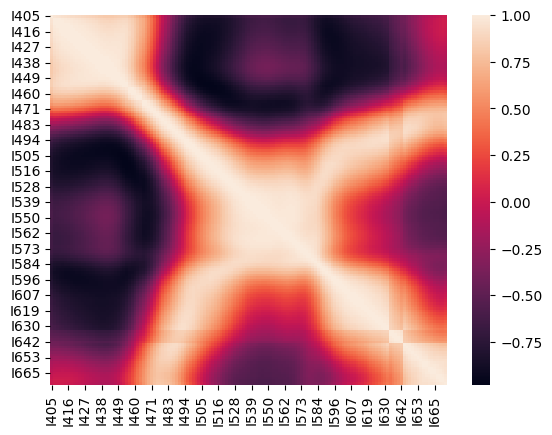

In [17]:
sns.heatmap(data_inorm.loc[:, "I405":"I673"].corr())

In [18]:
data_raw = pd.read_excel(".\data\data_preprocessed.xlsx", index_col=0)

<Axes: >

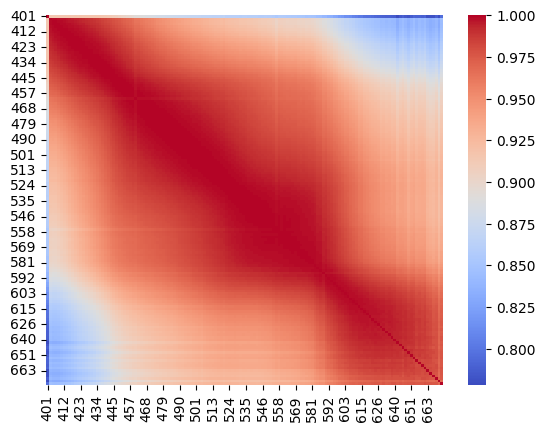

In [22]:
#fig = plt.figure(figsize=(4, 4))
sns.heatmap(data_raw.loc[:, "401":"673"].drop(columns="638").corr(), annot=False, cmap="coolwarm")

In [20]:
rename_cols = {wl: str(wl)[:3] for wl in data_raw.columns[6:227]}
data_raw.rename(columns=rename_cols, inplace=True)

In [10]:
num_cols = data_merged_dnorm.select_dtypes(exclude="object").columns

<Axes: >

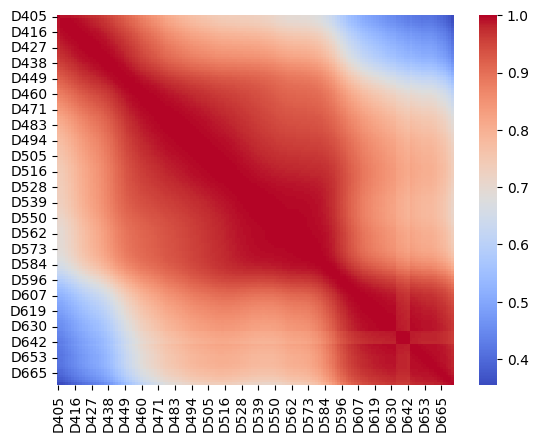

In [23]:
#fig = plt.figure(figsize=(6, 6))
#sns.heatmap(data_merged_dnorm.loc[:, num_cols[142:]].corr(), annot=False, cmap="coolwarm")
sns.heatmap(data_merged_dnorm.loc[:, "D405":"D673"].corr(), cmap="coolwarm")

In [6]:
pca = PCA(n_components=10)
data_trans = pd.DataFrame(pca.fit_transform(data_merged_dnorm.loc[:, "D405":"D673"]), columns=[f"pca{i}" for i in range(10)])

<Axes: >

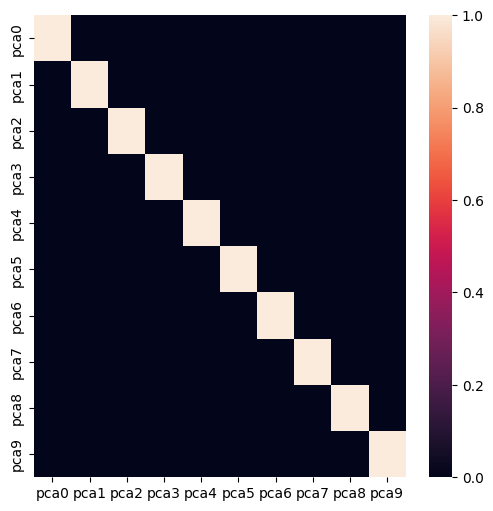

In [7]:
fig = plt.figure(figsize=(6, 6))
sns.heatmap(data_trans.loc[:, "pca0":"pca9"].corr(), annot=False)

In [8]:
data_trans = data_trans.merge(data_merged_dnorm.loc[:, "GROUP":], left_index=True, right_index=True)

In [9]:
cat_cols = data_trans.select_dtypes(include="object").columns

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    data_trans[col] = encoder.fit_transform(data_trans[col])

In [11]:
data_trans["IDcard"] = id_card
data_group = data_trans.groupby(by=["IDcard"]).mean()

In [12]:
target_stage = data_group["STAGE"]
target_park = data_group["PARKINSON"]
data_group.drop(columns=["STAGE", "PARKINSON"], inplace=True)

In [13]:
data_group.rename(columns={i: str(i) for i in range(10)}, inplace=True)

<Axes: >

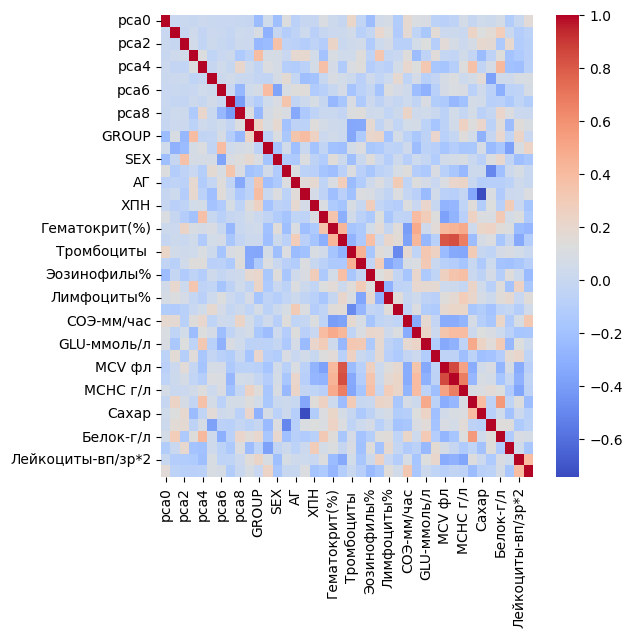

In [14]:
fig = plt.figure(figsize=(6, 6))
sns.heatmap(data_group.drop(columns="Подагра").corr(), cmap="coolwarm")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_group, target_park, stratify=target_park, random_state=42)

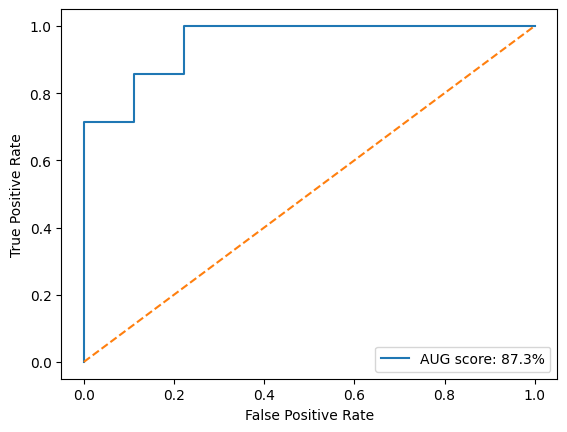

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
legend = []
clf = LogisticRegression(penalty="l2", random_state=10, solver="liblinear")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

score = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, _= roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(fpr, tpr)
plt.plot ([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend([f"AUG score: {score * 100 :.1f}%"])